In [16]:
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math

In [17]:
# csv file name
f = ["Set1.csv","Set2.csv"]

In [18]:
data = []
for i in range(len(f)):
    with open(f[i], newline='') as file:
        rows = csv.reader(file)
        #Ignore header
        headers = next(rows, None)
        temp_data = []
        for row in rows:
            temp_data.append(float(row[0]))
        data.append(np.array(temp_data))
print(len(data[0]),len(data[1]))

100 30


# MLE of Normal Distribution
Fit data by $N(\mu,\sigma^2)$  
Theoretical derivation:
$$L(\mu,\sigma^2|data) = \Pi^n_{i=1}f(x_i|\mu,\sigma^2)$$  
$$=\Pi^n_{i=1}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$$ $$=(\frac{1}{\sqrt{2\pi\sigma^2}})^ne^{-\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2}}$$  
$$(\hat{\mu}_{MLE},\hat{\sigma^2}_{MLE}) = \arg L(\mu,\sigma^2|data)=\arg \ln L(\mu,\sigma^2|data)$$  
$$l = \ln L(\mu,\sigma^2|data) = -\frac{n}{2}\ln(2\pi\sigma^2)-\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2}$$  
$$\begin{cases} \frac{\delta l}{\delta\mu}=\frac{2\sum^n_{i=1}(x_i-\mu)}{2\sigma^2} = \frac{\sum^n_{i=1}(x_i-\mu)}{\sigma^2}\overset{Letting}{=} 0 \rightarrow(1)\\ \frac{\delta l}{\delta\sigma^2}=-\frac{n\times 2\pi}{2\times 2\pi\sigma^2}+\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^4}=\frac{-n\sigma^2+\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^4} \overset{Letting}{=} 0\rightarrow(2)\end{cases}$$  
$$From\space (1), {\sum^n_{i=1}(x_i-\hat{\mu}_{MLE})}=0$$
$$\sum^n_{i=1}(x_i)-n*\hat{\mu}_{MLE}=0$$  
$$\therefore\hat{\mu}_{MLE} = \frac{\sum^n_{i=1}(x_i)}{n} = \bar{x}$$  
$$From\space (2), -n\hat{\sigma}_{MLE}^2+\sum^n_{i=1}(x_i-\bar{x})^2 = 0$$  
$$\therefore\hat{\sigma}_{MLE}^2 = \frac{\sum^n_{i=1}(x_i-\bar{x})^2}{n}$$  


In [19]:
def MLE_normal(data):
    mu = np.mean(data)
    sigma_square = np.var(data)
    return mu,sigma_square

In [20]:
mu,sigma_square = MLE_normal(data[0])
sigma = math.sqrt(sigma_square)

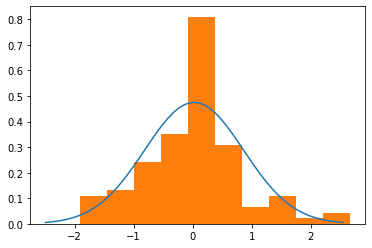

In [21]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.hist(data[0],density = True)
plt.show()